In [2]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cat = intake.open_catalog('https://raw.githubusercontent.com/ldeo-glaciology/pangeo-pismpaleo/main/paleopism.yaml')


In [4]:
cat

paleopism:
  args:
    path: https://raw.githubusercontent.com/ldeo-glaciology/pangeo-pismpaleo/main/paleopism.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [16]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:35143")
client

<Client: 'tcp://127.0.0.1:35143' processes=4 threads=4, memory=14.65 GiB>

In [19]:
present  = cat["present"].to_dask()
snapshots = cat["snapshots1ka"].to_dask()

In [20]:
snapshots

,Array,Chunk
Bytes,17.30 GiB,885.99 MiB
Shape,"(125, 381, 381, 4, 4, 4, 4)","(25, 381, 381, 1, 4, 4, 4)"
Count,2 Graph Layers,20 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,17.30 GiB,885.99 MiB
Shape,"(125, 381, 381, 4, 4, 4, 4)","(25, 381, 381, 1, 4, 4, 4)"
Count,2 Graph Layers,20 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


Trying out plotting mean surface height for 1 ensemble member over time

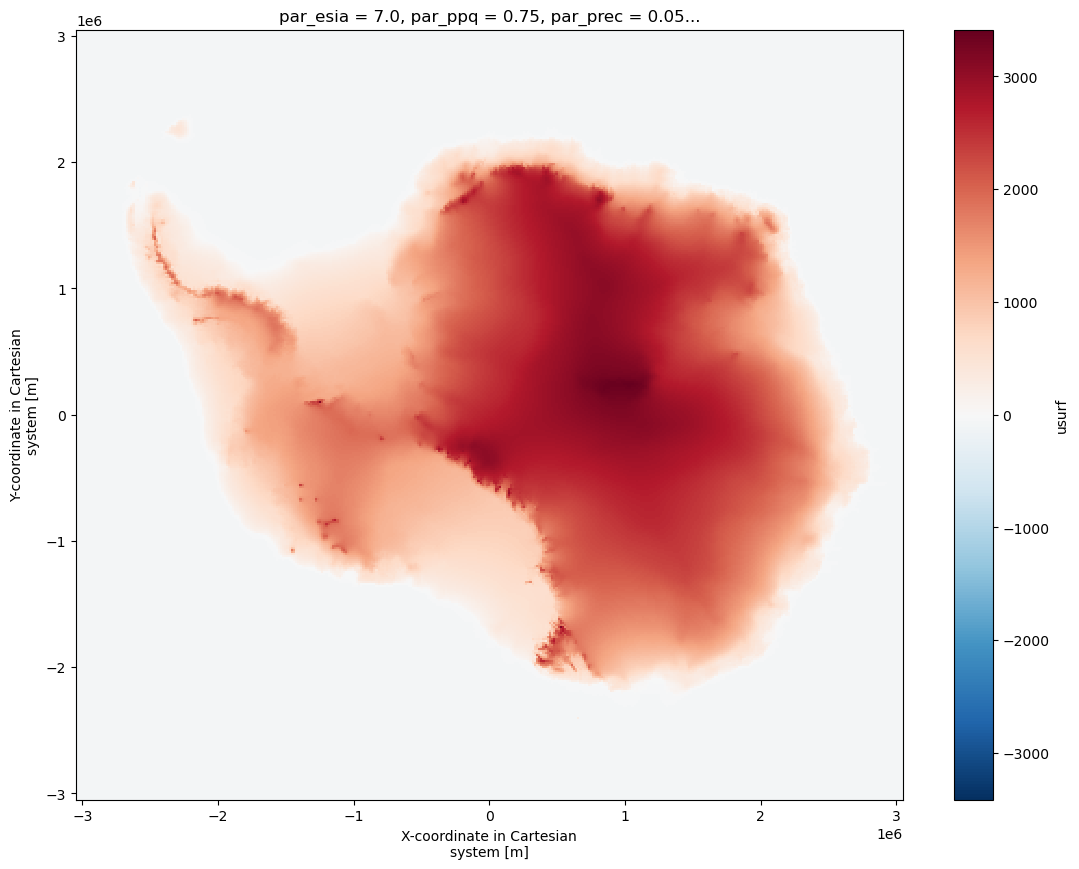

In [22]:
snapshots.usurf.isel(par_esia=3,par_ppq = 2, par_prec= 1,par_visc = 2).mean(dim='time').plot(size = 10)


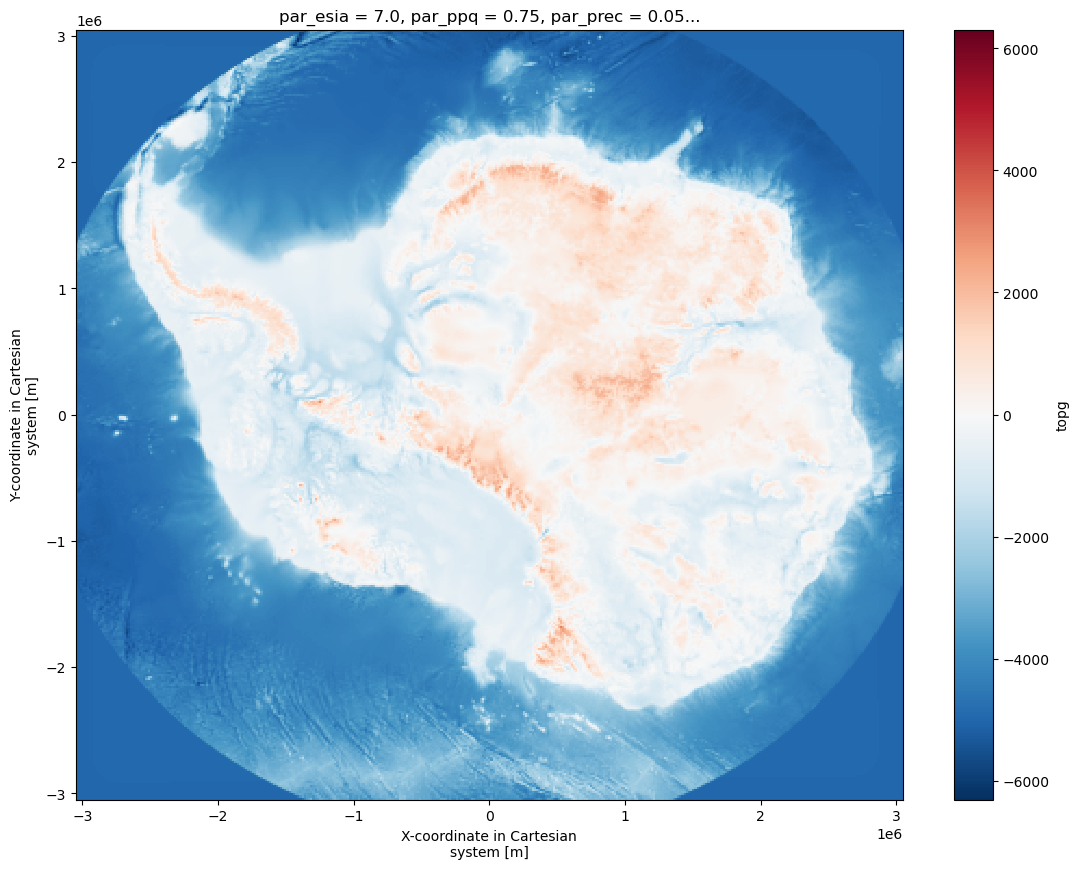

In [23]:
snapshots.topg.isel(par_esia=3,par_ppq = 2, par_prec= 1,par_visc = 2).mean(dim='time').plot(size = 10)


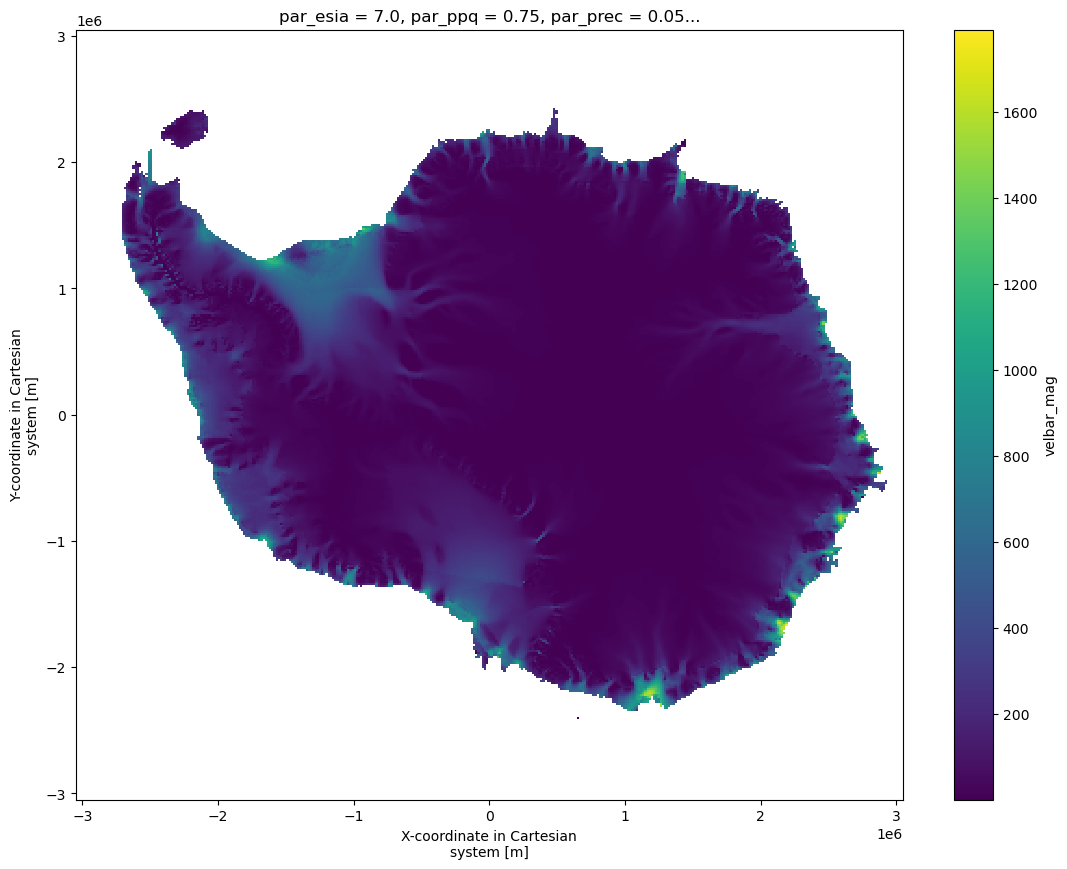

In [24]:
snapshots.velbar_mag.isel(par_esia=3,par_ppq = 2, par_prec= 1,par_visc = 2).mean(dim='time').plot(size = 10)


Now let's try to format this data for a very simple NN that takes into account position, bed thickness, surface height?

In [27]:
snapshots.topg

,Array,Chunk
Bytes,17.30 GiB,885.99 MiB
Shape,"(125, 381, 381, 4, 4, 4, 4)","(25, 381, 381, 1, 4, 4, 4)"
Count,2 Graph Layers,20 Chunks
Type,float32,numpy.ndarray


In [29]:
! pip install xbatcher
import xbatcher